# Predicting Heart Disease Risk Using Logistic Regression and Cross-Validation Techniques

Cardiovascular diseases (CVD) are one of the leading causes of death globally, and early detection of heart disease can significantly improve patient outcomes. Medical practitioners and healthcare systems require accurate predictive models to identify individuals at high risk of developing heart disease so that preventive measures can be implemented.

In this context, the aim is to develop a machine learning model using the Logistic Regression algorithm to predict the presence or absence of heart disease in patients based on various clinical features such as age, cholesterol levels, blood pressure, etc. The dataset contains relevant patient information, and the model will be trained and evaluated to assess its performance.

The solution involves:

1. Data preprocessing: Handling missing values, normalizing features, and splitting the data into training and test sets.

2. Modeling: Using Logistic Regression to fit the model on the training data and evaluating its performance on the test data.

3. Evaluation: The model will be evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Additionally, cross-validation techniques will be applied to assess the model's generalizability.

4. Outcome: The project aims to build a reliable heart disease prediction model and validate it using k-fold cross-validation, providing robust performance estimates across multiple metrics.


In [1]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


In [2]:
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold, cross_validate
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import json
import warnings
warnings.filterwarnings("ignore")

jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/43e645df49574951b47bd1a9ddf779f2.csv")
heart = pd.read_csv(jupyter_notebook_dataset)


In [4]:
# Display the first few rows of the dataset to understand its structure
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Display the shape of the dataset (rows, columns)
heart.shape


(1025, 14)

In [6]:
# Generate descriptive statistics to understand the range, mean, and other info of each feature
heart.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check for any missing values in the dataset

heart.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Split the dataset into features (X) and target variable (y)
# 'target' is the column that indicates whether heart disease is present or not

X = heart.drop(columns=['target'])
y = heart['target']



In [9]:
# Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [10]:
# Initialize the logistic regression model with a random state for reproducibility
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Train (fit) the logistic regression model using the training data

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [12]:
# Predict the target variable for the test set and store it in a variable 'y_pred'


y_pred = model.predict(X_test)



In [13]:
# calculate the confusion matrix and store it in a variable 'cnf_matrix'

cnf_matrix = confusion_matrix(y_test, y_pred)



In [14]:
# Calculate and display the accuracy score and store it in a variable 'accuracy'
def get_accuracy(): 
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy  # replace with actual accuracy


In [15]:
accuracy = get_accuracy()
accuracy


0.8097560975609757

In [16]:
# Calculate precision, recall, and f1-score separately
# and store it in a variable 'precision' , 'recall' & 'f1' respectively 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


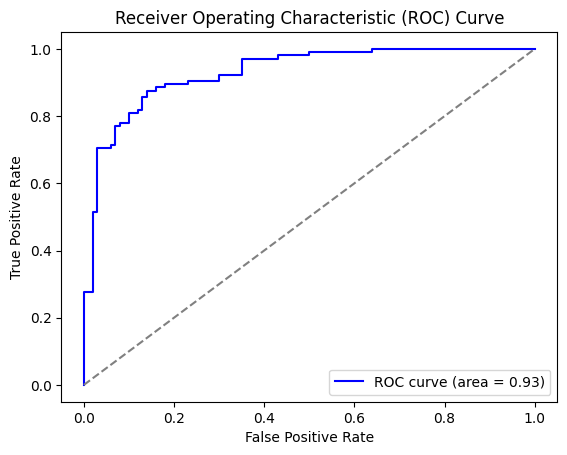

In [17]:
# Generate ROC curve data for the logistic regression model


# Plotting the ROC curve

# Generate ROC curve data for the logistic regression model
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



In [18]:
# Set up KFold cross-validation with 5 folds, shuffling the data for randomness
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)  #Remove the comment from this line and then use it for further analysis 

kfold = KFold(n_splits=5, shuffle=True, random_state=42)




In [19]:
# Define scoring metrics

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']



In [20]:
# Perform cross-validation and get multiple metrics

cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)



In [21]:
# Calculate and display the accuracy score and store it in a variable 'accuracy_cv'
def get_accuracy():  
    accuracy_cv = np.mean(cv_results['test_accuracy'])
    return accuracy_cv  # replace with actual accuracy

In [22]:
accuracy_cv = get_accuracy()
accuracy_cv


0.8370731707317074

In [23]:
# Calculate the mean (average) of the different metrics across the cross-validation folds
# and store it in a variable 'mean_accuracy' , 'mean_precision' , 'mean_recall' , 'mean_f1' & 'mean_roc_auc' respectively
mean_accuracy = np.mean(cv_results['test_accuracy'])
mean_precision = np.mean(cv_results['test_precision'])
mean_recall = np.mean(cv_results['test_recall'])
mean_f1 = np.mean(cv_results['test_f1'])
mean_roc_auc = np.mean(cv_results['test_roc_auc'])

